In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

# EDA

### 1. Data Information

In [2]:
df_bigmart = pd.read_csv('bigmart_data.csv')
df_bigmart.info()
df_bigmart.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_bigmart.shape

(8523, 12)

In [4]:
df_bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

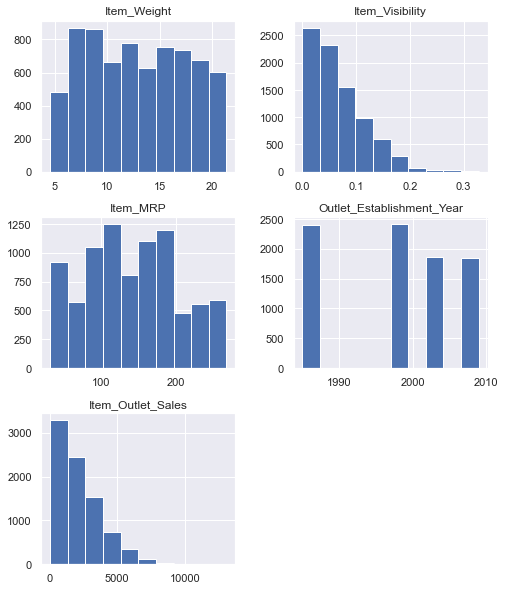

In [5]:
df_bigmart.hist(figsize=(8,10))

### 2. Interpreting Data

In [6]:
df_bigmart.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [7]:
pd.pivot_table(data=df_bigmart, values = ['Item_Weight'], index = ['Item_Type'], aggfunc = 'mean').sort_values('Item_Weight', ascending = False)

,Item_Weight
Item_Type,
Others,13.853285
Starchy Foods,13.690731
Dairy,13.426069
Household,13.384736
Fruits and Vegetables,13.224769
Health and Hygiene,13.142314
Snack Foods,12.987880
Frozen Foods,12.867061
Meat,12.817344


In [8]:
pd.pivot_table(data=df_bigmart, values = ['Item_Visibility'], index = ['Outlet_Type', 'Item_Type'], aggfunc = 'mean').sort_values('Item_Visibility', ascending = False)

Item_Visibility
Outlet_Type       Item_Type                          
Grocery Store     Starchy Foods              0.134157
                  Breakfast                  0.132249
                  Baking Goods               0.121518
                  Dairy                      0.118935
                  Seafood                    0.110333
...                                               ...
Supermarket Type1 Health and Hygiene         0.051180
Supermarket Type3 Starchy Foods              0.050326
Supermarket Type2 Others                     0.050069
Supermarket Type3 Health and Hygiene         0.048012
Supermarket Type2 Health and Hygiene         0.047908

[64 rows x 1 columns]

In [9]:
pd.pivot_table(data=df_bigmart, values = ['Item_MRP'], index = ['Outlet_Type', 'Item_Type'], aggfunc = 'mean').sort_values('Item_MRP', ascending = False)

Item_MRP
Outlet_Type       Item_Type                
Supermarket Type2 Hard Drinks    164.050791
                  Seafood        155.712229
Grocery Store     Household      151.950499
Supermarket Type2 Starchy Foods  151.786918
                  Snack Foods    151.539715
...                                     ...
Supermarket Type1 Baking Goods   125.975262
Supermarket Type3 Seafood        124.028286
                  Soft Drinks    123.313587
Grocery Store     Hard Drinks    117.189350
Supermarket Type3 Others         106.779053

[64 rows x 1 columns]

In [10]:
pd.pivot_table(data=df_bigmart, values = ['Item_Outlet_Sales'], index = ['Outlet_Type', 'Item_Type'], aggfunc = 'mean').sort_values('Item_Outlet_Sales', ascending = False)

Item_Outlet_Sales
Outlet_Type       Item_Type                               
Supermarket Type3 Breakfast                    4584.759327
                  Fruits and Vegetables        4114.487061
                  Dairy                        3915.182245
                  Meat                         3862.293911
                  Household                    3821.207782
...                                                    ...
Grocery Store     Starchy Foods                 300.122154
                  Baking Goods                  292.082544
                  Others                        288.094126
                  Hard Drinks                   243.155708
                  Seafood                       228.435980

[64 rows x 1 columns]

# Data Cleaning

In [11]:
df_bigmart.duplicated().any()

False

<AxesSubplot:>

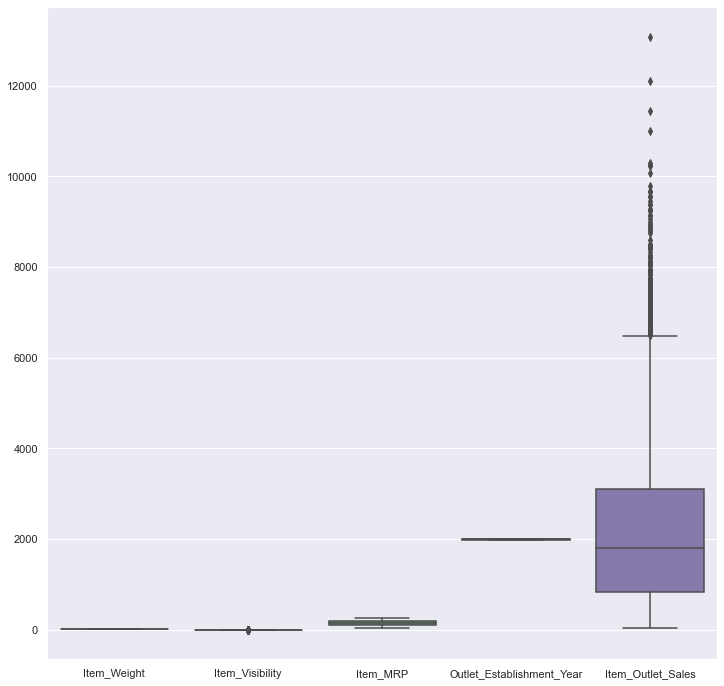

In [12]:
plt.figure(figsize=(12,12))
sns.boxplot(data = df_bigmart, orient = 'vertical')

In [13]:
df_bigmart.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isna().sum()).reset_index()
    miss1.columns = ['columns', 'Total']
    miss2 = pd.DataFrame(df.isna().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', '%']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Total']!=0]

In [15]:
missing_data(df_bigmart)

,columns,Total,%
1,Item_Weight,1463,17.165317
8,Outlet_Size,2410,28.276428


## Cleaning Missing Values 

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

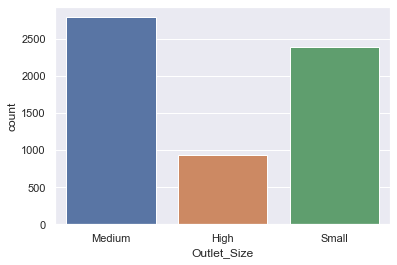

In [16]:
sns.countplot(df_bigmart['Outlet_Size'])

In [17]:
df_bigmart.dropna(how='any',axis = 0,inplace=True)

In [18]:
df_bigmart['Item_Weight'].describe()

count    4650.000000
mean       12.898675
std         4.670973
min         4.555000
25%         8.770000
50%        12.650000
75%        17.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [19]:
mean_item_weight = df_bigmart['Item_Weight'].mean()
df_bigmart['Item_Weight'] = df_bigmart['Item_Weight'].fillna(mean_item_weight)

In [20]:
df_bigmart.isna().sum().sort_values(ascending=False)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Cleaning Outliers

In [21]:
def outlier(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn,[25,75])
    IQR= q3 - q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    return lower,upper

In [22]:
lower,upper = outlier(df_bigmart['Item_Outlet_Sales'])
print(lower,upper)

-1854.41945 6091.23775


In [23]:
sales_outliers = df_bigmart[(df_bigmart['Item_Outlet_Sales'] < lower) | (df_bigmart['Item_Outlet_Sales']>upper)]
sales_outliers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.350,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
55,FDK21,7.905,Low Fat,0.010053,Snack Foods,249.0408,OUT018,2009,Medium,Tier 3,Supermarket Type2,6258.5200
145,FDP16,18.600,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
146,FDB11,16.000,Low Fat,0.060837,Starchy Foods,226.8404,OUT035,2004,Small,Tier 2,Supermarket Type1,6301.1312
276,FDY55,16.750,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,High,Tier 3,Supermarket Type1,7452.9652
...,...,...,...,...,...,...,...,...,...,...,...,...
8087,FDF04,17.500,Low Fat,0.013637,Frozen Foods,258.5304,OUT046,1997,Small,Tier 1,Supermarket Type1,6199.9296
8113,FDN09,14.150,Low Fat,0.034868,Snack Foods,243.7828,OUT035,2004,Small,Tier 2,Supermarket Type1,6579.4356
8245,FDU55,16.200,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8350,NCE18,10.000,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750


In [24]:
df_bigmart.drop(sales_outliers.index, inplace = True)

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

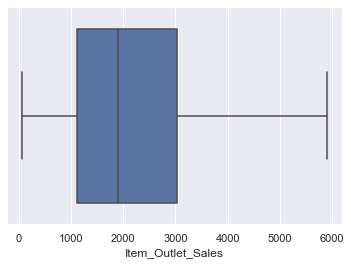

In [25]:
sns.boxplot(df_bigmart['Item_Outlet_Sales'], showfliers=False)

# Visualization

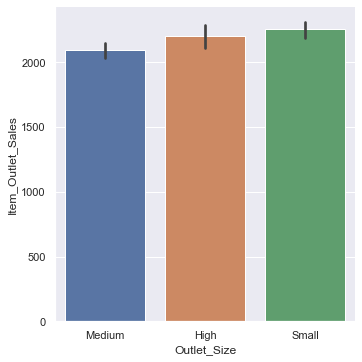

In [26]:
sns.catplot(data= df_bigmart, x = 'Outlet_Size', y = 'Item_Outlet_Sales', kind = 'bar')

<Figure size 720x720 with 0 Axes>

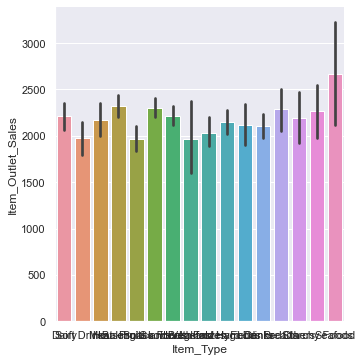

In [28]:
plt.figure(figsize=(10,10))
sns.catplot(data= df_bigmart, x = 'Item_Type', y = 'Item_Outlet_Sales', kind = 'bar')
plt.show()

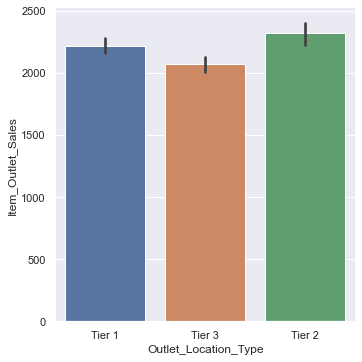

In [29]:
sns.catplot(data= df_bigmart, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', kind = 'bar')

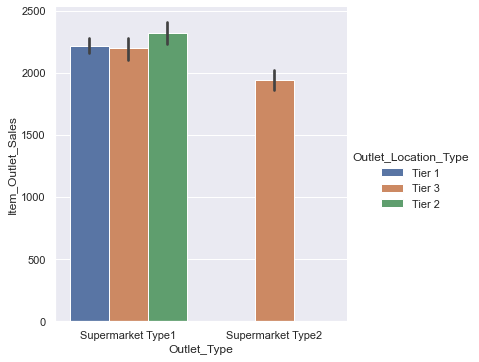

In [30]:
sns.catplot(data= df_bigmart, x = 'Outlet_Type', y = 'Item_Outlet_Sales',hue='Outlet_Location_Type', kind = 'bar')

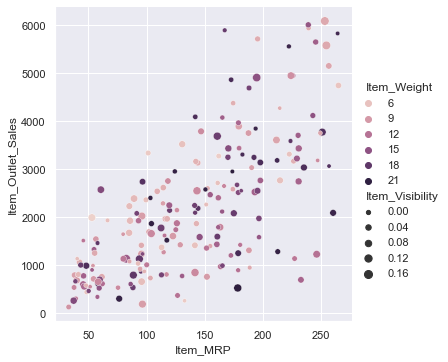

In [32]:
sns.relplot(data= df_bigmart[:200], x = 'Item_MRP', y = 'Item_Outlet_Sales', size = 'Item_Visibility', hue='Item_Weight', kind = 'scatter')

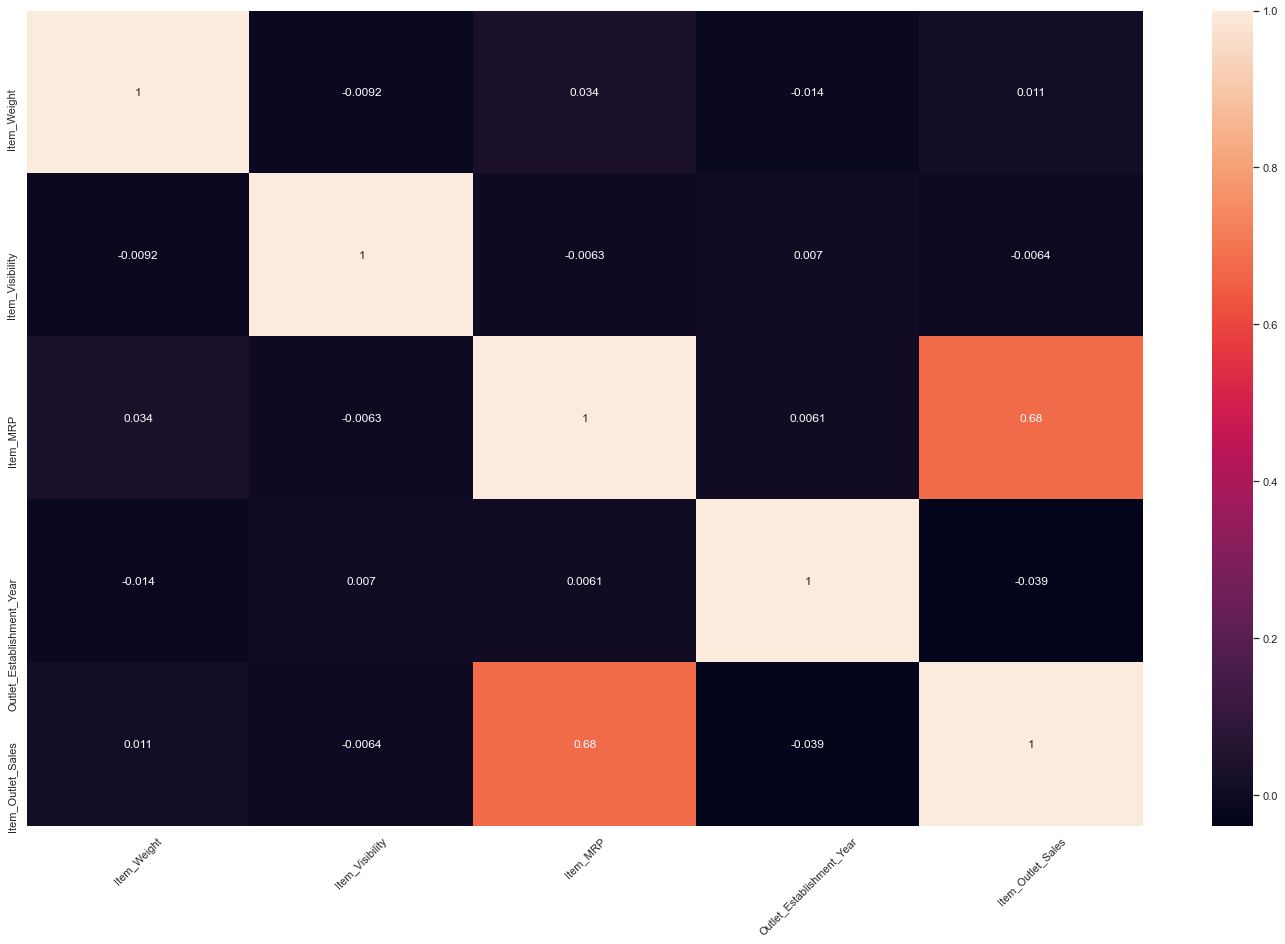

In [34]:
plt.figure(figsize=(25,15))
corr_matrix = df_bigmart.corr()
sns.heatmap(data = corr_matrix, annot = True)
plt.xticks(rotation=45)
plt.show()

In [36]:
dfcorr = df_bigmart.corr(method='pearson')['Item_Outlet_Sales']
sorted_dfcorr = dfcorr.abs().sort_values(ascending=False)
print(sorted_dfcorr)

Item_Outlet_Sales            1.000000
Item_MRP                     0.675478
Outlet_Establishment_Year    0.039173
Item_Weight                  0.011041
Item_Visibility              0.006415
Name: Item_Outlet_Sales, dtype: float64


# Converting Data

In [33]:
df_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4557 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4557 non-null   object 
 1   Item_Weight                4557 non-null   float64
 2   Item_Fat_Content           4557 non-null   object 
 3   Item_Visibility            4557 non-null   float64
 4   Item_Type                  4557 non-null   object 
 5   Item_MRP                   4557 non-null   float64
 6   Outlet_Identifier          4557 non-null   object 
 7   Outlet_Establishment_Year  4557 non-null   int64  
 8   Outlet_Size                4557 non-null   object 
 9   Outlet_Location_Type       4557 non-null   object 
 10  Outlet_Type                4557 non-null   object 
 11  Item_Outlet_Sales          4557 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 591.9+ KB


In [37]:
df_bigmart.drop(['Item_Identifier'], axis=1, inplace=True)

In [38]:
df_bigmart['Item_Fat_Content']=df_bigmart['Item_Fat_Content'].astype('category').cat.codes
df_bigmart['Item_Type']=df_bigmart['Item_Type'].astype('category').cat.codes
df_bigmart['Outlet_Identifier']=df_bigmart['Outlet_Identifier'].astype('category').cat.codes
df_bigmart['Outlet_Size']=df_bigmart['Outlet_Size'].astype('category').cat.codes
df_bigmart['Outlet_Location_Type']=df_bigmart['Outlet_Location_Type'].astype('category').cat.codes
df_bigmart['Outlet_Type']=df_bigmart['Outlet_Type'].astype('category').cat.codes

In [39]:
df_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4557 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4557 non-null   float64
 1   Item_Fat_Content           4557 non-null   int8   
 2   Item_Visibility            4557 non-null   float64
 3   Item_Type                  4557 non-null   int8   
 4   Item_MRP                   4557 non-null   float64
 5   Outlet_Identifier          4557 non-null   int8   
 6   Outlet_Establishment_Year  4557 non-null   int64  
 7   Outlet_Size                4557 non-null   int8   
 8   Outlet_Location_Type       4557 non-null   int8   
 9   Outlet_Type                4557 non-null   int8   
 10  Item_Outlet_Sales          4557 non-null   float64
dtypes: float64(4), int64(1), int8(6)
memory usage: 369.3 KB


# Machine Learning

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE